In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams.update({'font.size':22})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print('Done')

Done


In [2]:
def get_mean_std(data, grp_cols, agg_col):
    df_mu = data.groupby(grp_cols)[agg_col].apply(lambda x: np.average(x)).reset_index()
    df_mu.columns = grp_cols + [f'Mean_{agg_col}']

    df_sigma = data.groupby(grp_cols)[agg_col].apply(lambda x: np.std(x)).reset_index()
    df_sigma.columns = grp_cols + [f'Std_{agg_col}']

    df_g = df_mu.merge(df_sigma, on=grp_cols)
    return df_g

In [3]:
df_real = pd.read_csv('../Data/All_p_w_m.csv')
print(df_real.shape)
df_real.head()

(102654, 4)


,P,W,Exp,M
0,1,0.0,1,0.0
1,1,0.0,2,0.0
2,1,0.0,3,0.0
3,1,0.0,4,0.0
4,1,0.0,5,0.0


In [4]:
data = pd.read_csv('../Data/Real_data_projected_v2.csv')
print(data.shape)
data.head()

(2291400, 6)


,P,Exp,W,M_GB,M_RF,M_XGB
0,1,1,0.0,0.000000,0.000000,0.000000
1,1,1,0.1,0.425324,0.425324,0.425324
2,1,1,0.2,0.854600,0.854600,0.854600
3,1,1,0.3,1.281640,1.281640,1.281640
4,1,1,0.4,1.700407,1.698880,1.704911


In [5]:
col = 'RF'
df_g = get_mean_std(data, ["P","W"], f"M_{col}")
df_r = get_mean_std(df_real, ["P","W"], "M")

In [6]:
df_g.head()

,P,W,Mean_M_RF,Std_M_RF
0,1,0.0,0.000000,0.000000
1,1,0.1,0.426748,0.000803
2,1,0.2,0.852910,0.001655
3,1,0.3,1.277499,0.002442
4,1,0.4,1.700463,0.000288


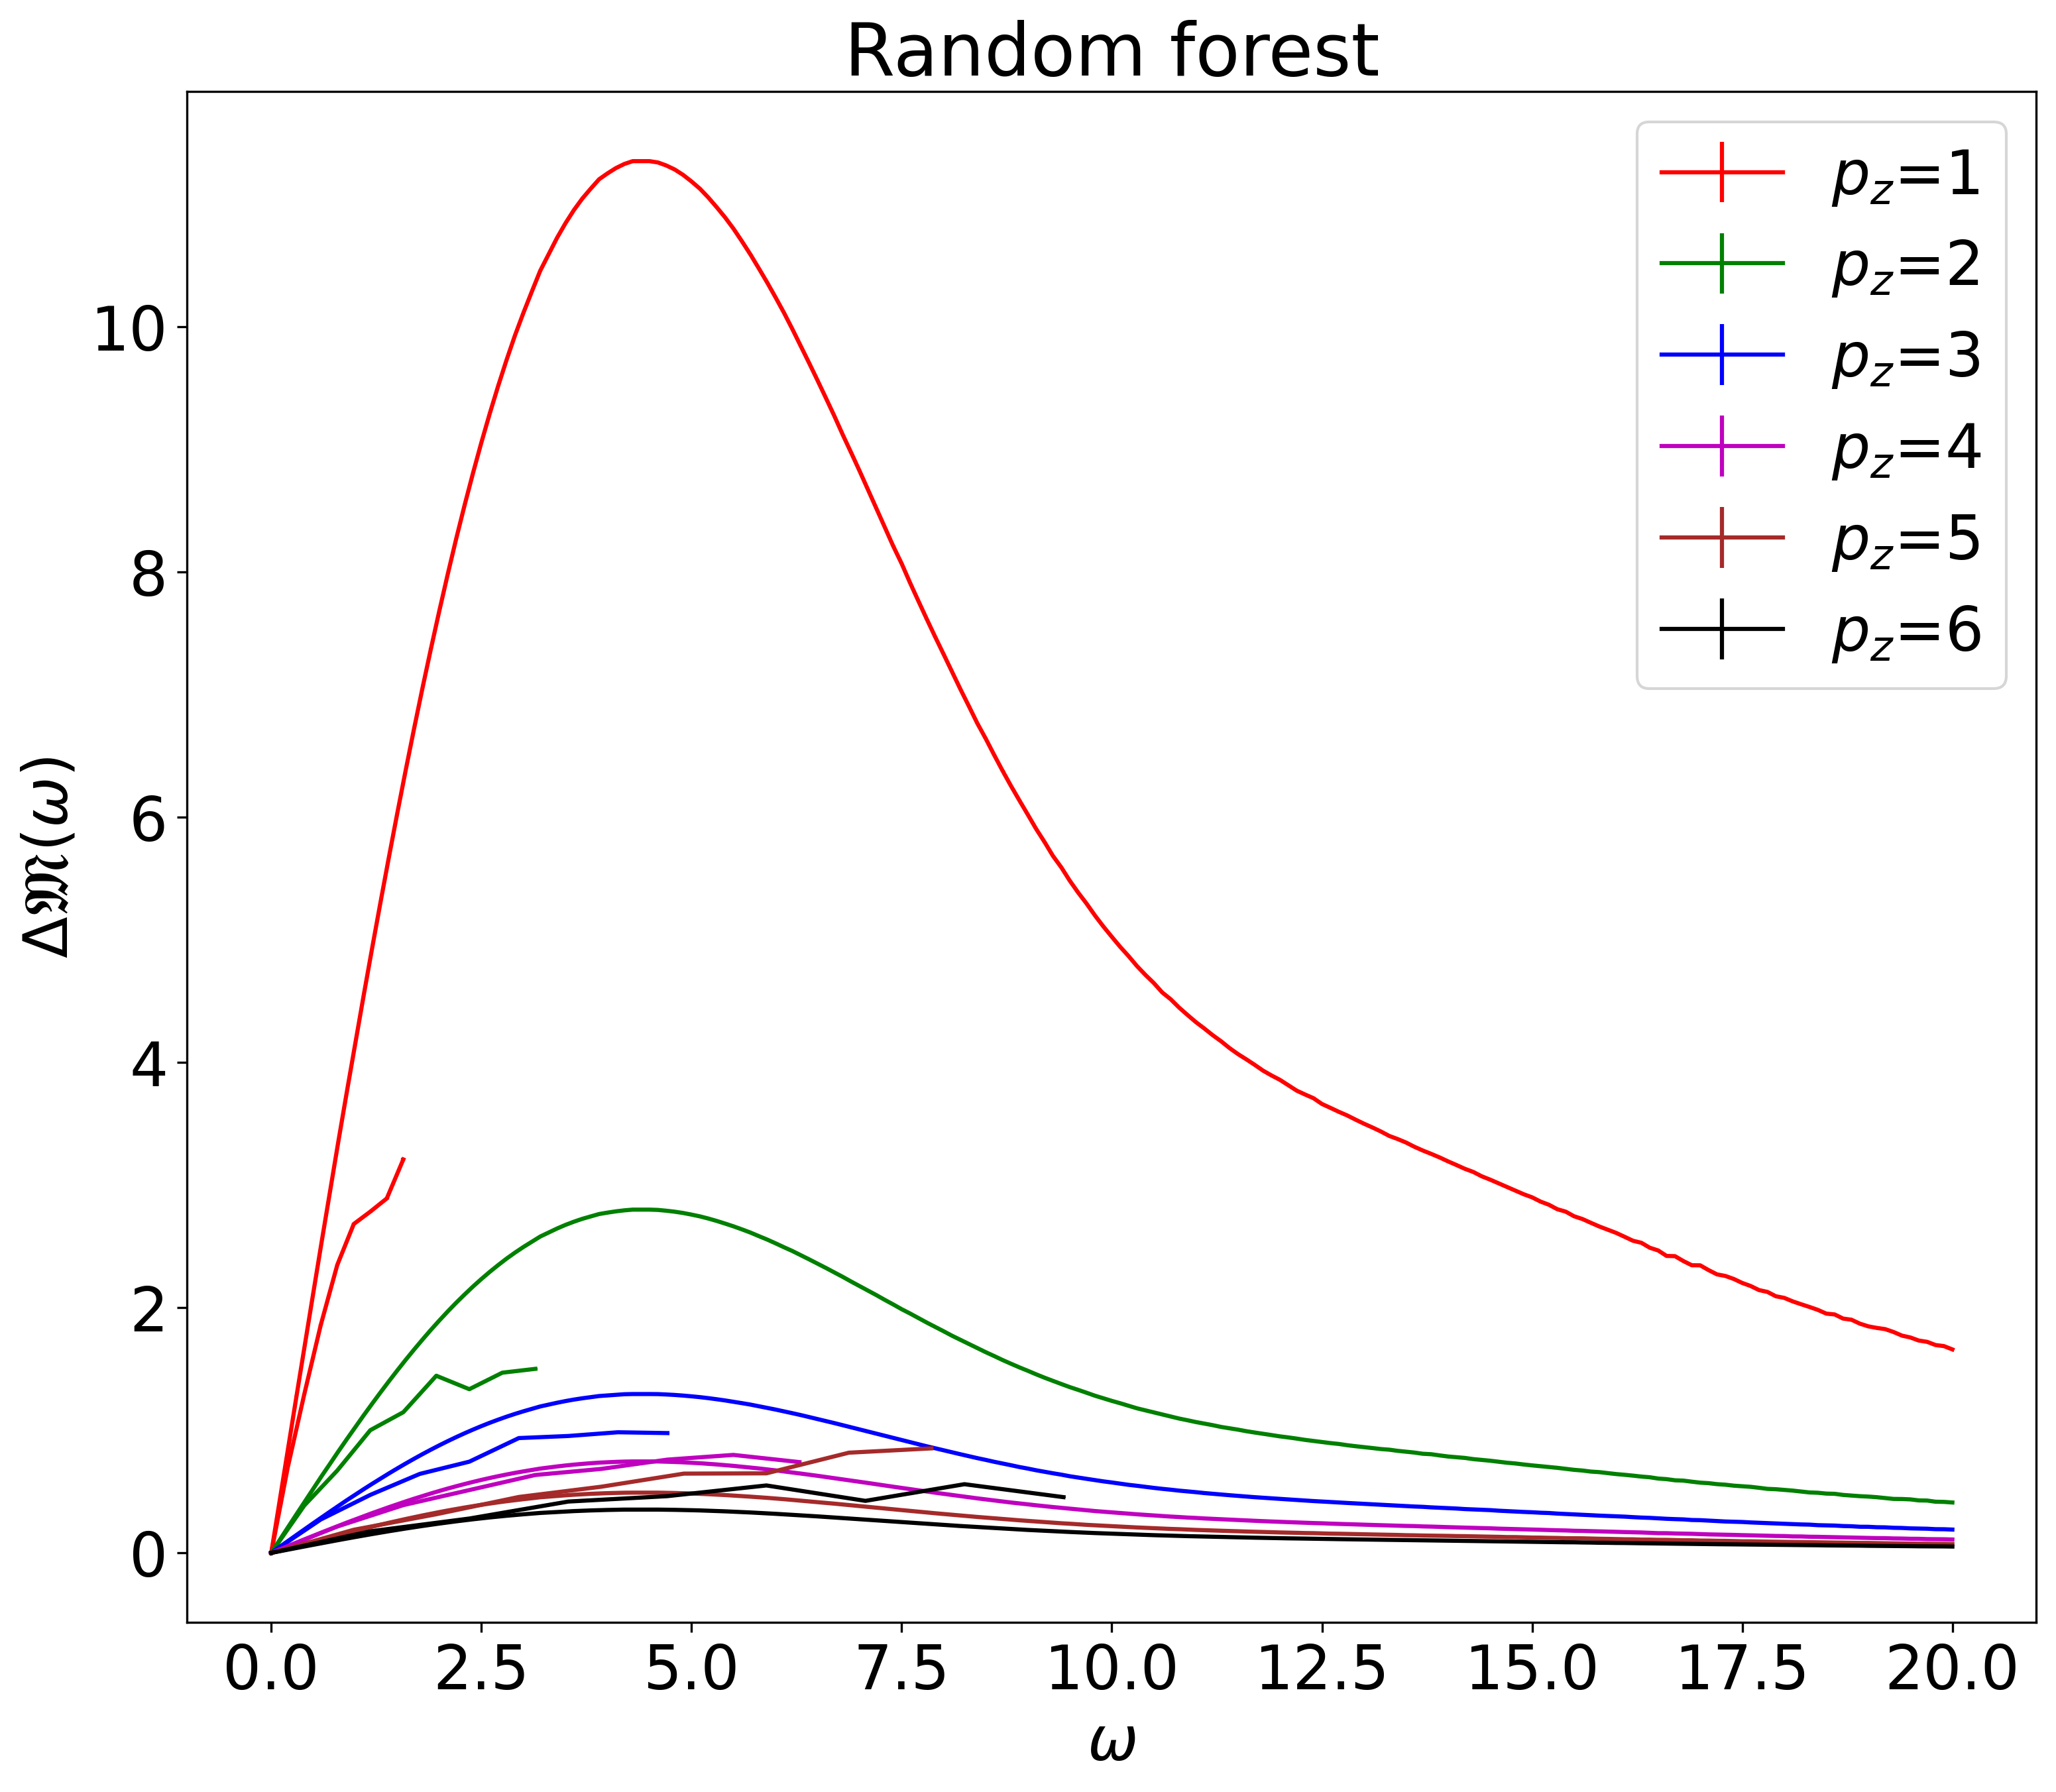

In [10]:
col = 'RF'
df_g = get_mean_std(data, ["P","W"], f"M_{col}")
df_r = get_mean_std(df_real, ["P","W"], "M")
colors = ['r','g','b','m','brown','black']

'''
plt.figure(dpi=300)
for p in range(1,7):
    t = df_g[df_g.P==p]
    #print(p,t.W.nunique())
    plt.plot(t.W, t.Mean_M, '-o', label=f"$p_z$={p}")
        
plt.xlabel('$\omega$')
plt.ylabel('$\Delta\mathfrak{M}(\omega)$')
plt.legend()
plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/P_W_M_curves.pdf', format='pdf', dpi=300)
plt.close()
'''

plt.figure(dpi=300)
for p in range(1,7):
    t = df_g[df_g.P==p]
    #plt.plot(t.W, t.Mean_M, '-', label=f"$p_z$={p}")
    plt.errorbar(x=t.W, y=t[f"Mean_M_{col}"], yerr=t[f"Std_M_{col}"], ecolor=colors[p-1], color=colors[p-1], label=f"$p_z$={p}")
    
    t = df_r[df_r.P==p]
    plt.errorbar(x=t.W, y=t[f"Mean_M"], yerr=t[f"Std_M"], ecolor=colors[p-1], color=colors[p-1])

if col=='GB':
    plt.title('Gradient boosted tree')
elif col=='RF':
    plt.title('Random forest')
elif col=='XGB':
    plt.title('Extreme gradient boosted tree')
    
plt.xlabel('$\omega$')
plt.ylabel('$\Delta\mathfrak{M}(\omega)$')
plt.legend()
plt.show()

## Compute $I(\omega)$

In [31]:
p1 = 2
p2 = 3
df_test = data[data.P.isin([p1,p2])]

a0 = []
a1 = []
ww = []
ei = []
td = []

for w in sorted(df_test.W.unique()):
    for exp in sorted(df_test.Exp.unique()):
        a = df_test.M_GB[np.logical_and(df_test.W==w, df_test.Exp==exp)].values
        I_GB = ((p2*p2*a[1])-(p1*p1*a[0]))/((p2**2)-(p1**2))
        
        a = df_test.M_RF[np.logical_and(df_test.W==w, df_test.Exp==exp)].values
        I_RF = ((p2*p2*a[1])-(p1*p1*a[0]))/((p2**2)-(p1**2))
        
        a = df_test.M_XGB[np.logical_and(df_test.W==w, df_test.Exp==exp)].values
        I_XGB = ((p2*p2*a[1])-(p1*p1*a[0]))/((p2**2)-(p1**2))
        
        td.append([w, exp, I_GB, I_RF, I_XGB])
    print(w, end=',')
        
print()
df_new_I = pd.DataFrame(td, columns=['W','Exp','I_GB','I_RF','I_XGB'])
df_new_I.to_csv('../Data/Projected_I.csv', index=False)
df_new_I.head()

0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,14.0,14.1,14.2,14.3,14.4,14.5,14.6,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,16.0,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.8,16.9,17.0,17.1,17.2,17.3,17.4,17.5,17.6,17.7,17.8,17.9,18.0,18.1,18.2,18.3,18.4,18.5,18.6,18.7,18.8,18.9,19.0,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,19.9,20.0,


,W,Exp,I_GB,I_RF,I_XGB
0,0.0,1,0.0,0.0,0.0
1,0.0,2,0.0,0.0,0.0
2,0.0,3,0.0,0.0,0.0
3,0.0,4,0.0,0.0,0.0
4,0.0,5,0.0,0.0,0.0


## Smoothing the curve

In [11]:
df_new_I = pd.read_csv('../Data/Projected_I.csv')
df_new_I.head()

,W,Exp,I_GB,I_RF,I_XGB
0,0.0,1,0.0,0.0,0.0
1,0.0,2,0.0,0.0,0.0
2,0.0,3,0.0,0.0,0.0
3,0.0,4,0.0,0.0,0.0
4,0.0,5,0.0,0.0,0.0


In [34]:
#!pip install --upgrade --quiet statsmodels
from statsmodels .tsa.seasonal import seasonal_decompose

def getSmoothCurve(val, period=10):
    result = seasonal_decompose(val, model='additive', extrapolate_trend='freq',period=period)
    return result.trend

In [35]:
df_new_I.loc[:,'smooth_IGB'] = 0.0
df_new_I.loc[:,'smooth_IRF'] = 0.0
df_new_I.loc[:,'smooth_IXGB'] = 0.0

df_new_I.sort_values(['Exp','W'], inplace=True, ascending=True)

for exp in range(1, 1901):
    vgb = df_new_I.I_GB[np.logical_and(df_new_I.Exp==exp, df_new_I.W>0)]
    vrf = df_new_I.I_RF[np.logical_and(df_new_I.Exp==exp, df_new_I.W>0)]
    vxgb = df_new_I.I_XGB[np.logical_and(df_new_I.Exp==exp, df_new_I.W>0)]
    
    df_new_I.smooth_IGB[np.logical_and(df_new_I.Exp==exp, df_new_I.W>0)] = getSmoothCurve(vgb)
    df_new_I.smooth_IRF[np.logical_and(df_new_I.Exp==exp, df_new_I.W>0)] = getSmoothCurve(vrf)
    df_new_I.smooth_IXGB[np.logical_and(df_new_I.Exp==exp, df_new_I.W>0)] = getSmoothCurve(vxgb)
    
    if exp%100==0:
        print(exp, 'Done')
    
df_new_I.to_csv('../Data/Projected_I_smooth.csv', index=False)
df_new_I.head()

100 Done
200 Done
300 Done
400 Done
500 Done
600 Done
700 Done
800 Done
900 Done
1000 Done
1100 Done
1200 Done
1300 Done
1400 Done
1500 Done
1600 Done
1700 Done
1800 Done
1900 Done


,W,Exp,I_GB,I_RF,I_XGB,smooth_IGB,smooth_IRF,smooth_IXGB
0,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1900,0.1,1,0.003369,0.003369,0.003369,0.004816,0.004930,0.005146
3800,0.2,1,0.006721,0.006721,0.006721,0.008071,0.008100,0.008290
5700,0.3,1,0.010712,0.010712,0.010712,0.011326,0.011269,0.011434
7600,0.4,1,0.013590,0.013834,0.013785,0.014581,0.014439,0.014578


In [12]:
df_new_I = pd.read_csv('../Data/Projected_I_smooth.csv')
df_gb = get_mean_std(df_new_I, ['W'], 'smooth_IGB')
df_rf = get_mean_std(df_new_I, ['W'], 'smooth_IRF')
df_xgb = get_mean_std(df_new_I, ['W'], 'smooth_IXGB')

In [22]:
df_xgb.head()

,W,Mean_smooth_IXGB,Std_smooth_IXGB
0,0.0,0.000000,0.000000
1,0.1,0.005067,0.000130
2,0.2,0.008233,0.000119
3,0.3,0.011399,0.000108
4,0.4,0.014565,0.000098


In [16]:
df_new_I.shape, df_gb.shape

((381900, 8), (201, 3))

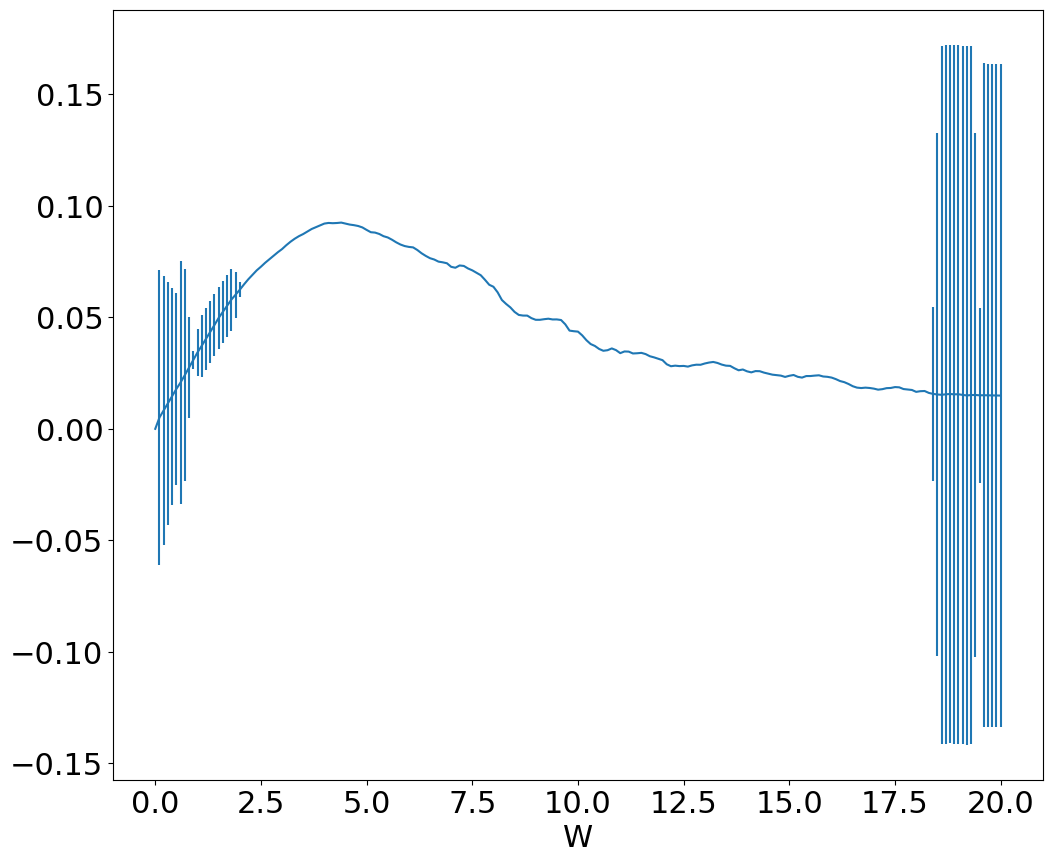

In [21]:
plt.figure()
plt.errorbar(x=df_gb['W'], y=df_gb['Mean_smooth_IGB'], yerr=[np.sqrt(df_new_I.shape[0]-1)*x for x in df_gb['Std_smooth_IGB'].values], )
plt.xlabel('W')
plt.show()

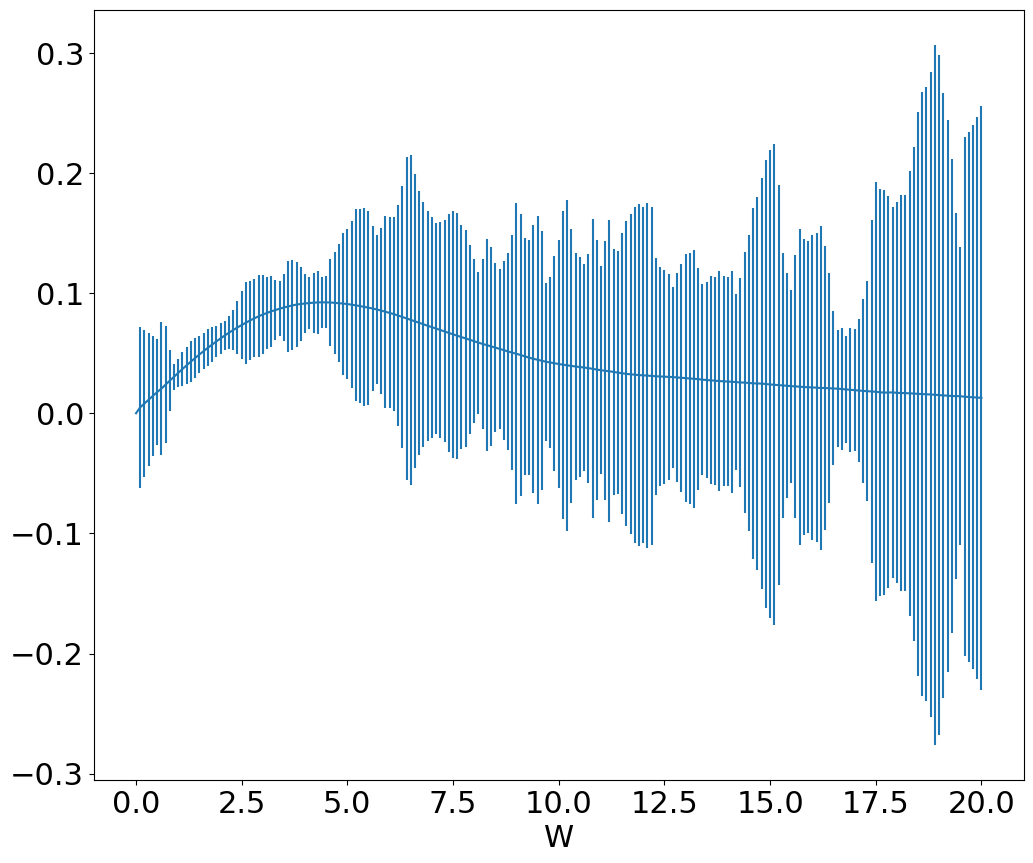

In [24]:
plt.figure()
plt.errorbar(x=df_rf['W'], y=df_rf['Mean_smooth_IRF'], yerr=[np.sqrt(df_new_I.shape[0]-1)*x for x in df_rf['Std_smooth_IRF'].values], )
plt.xlabel('W')
plt.show()

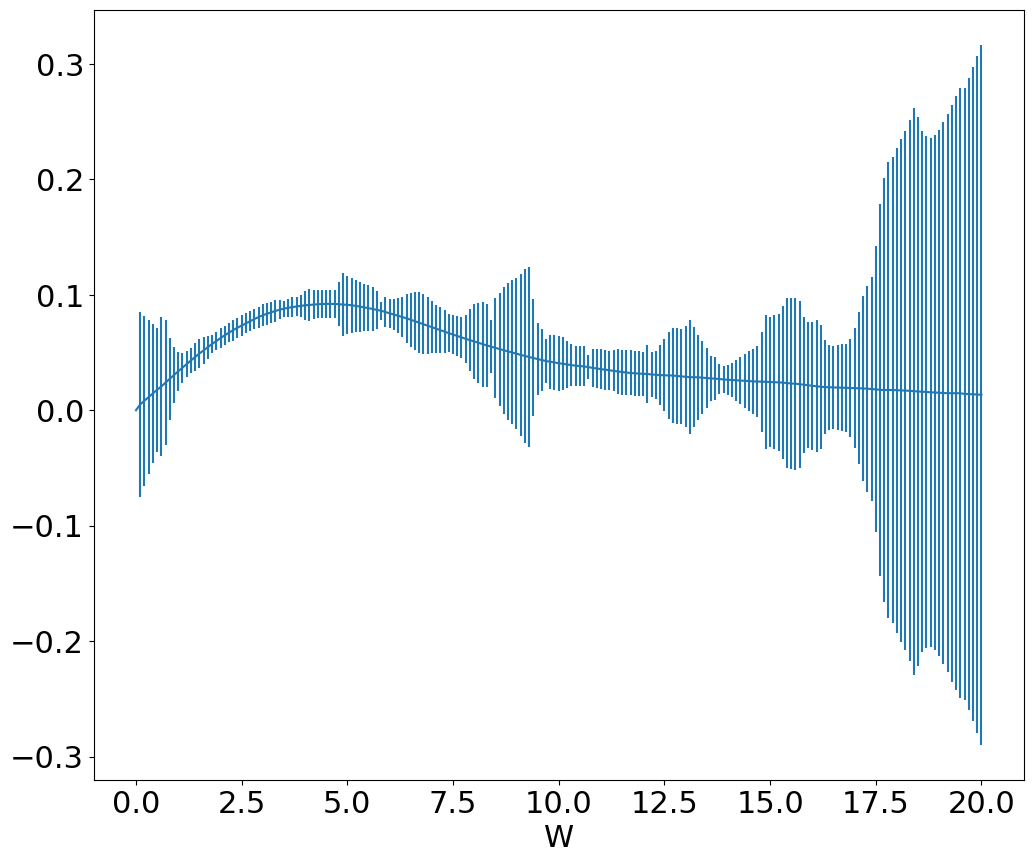

In [23]:
plt.figure()
plt.errorbar(x=df_xgb['W'], y=df_xgb['Mean_smooth_IXGB'], yerr=[np.sqrt(df_new_I.shape[0]-1)*x for x in df_xgb['Std_smooth_IXGB'].values], )
plt.xlabel('W')
plt.show()

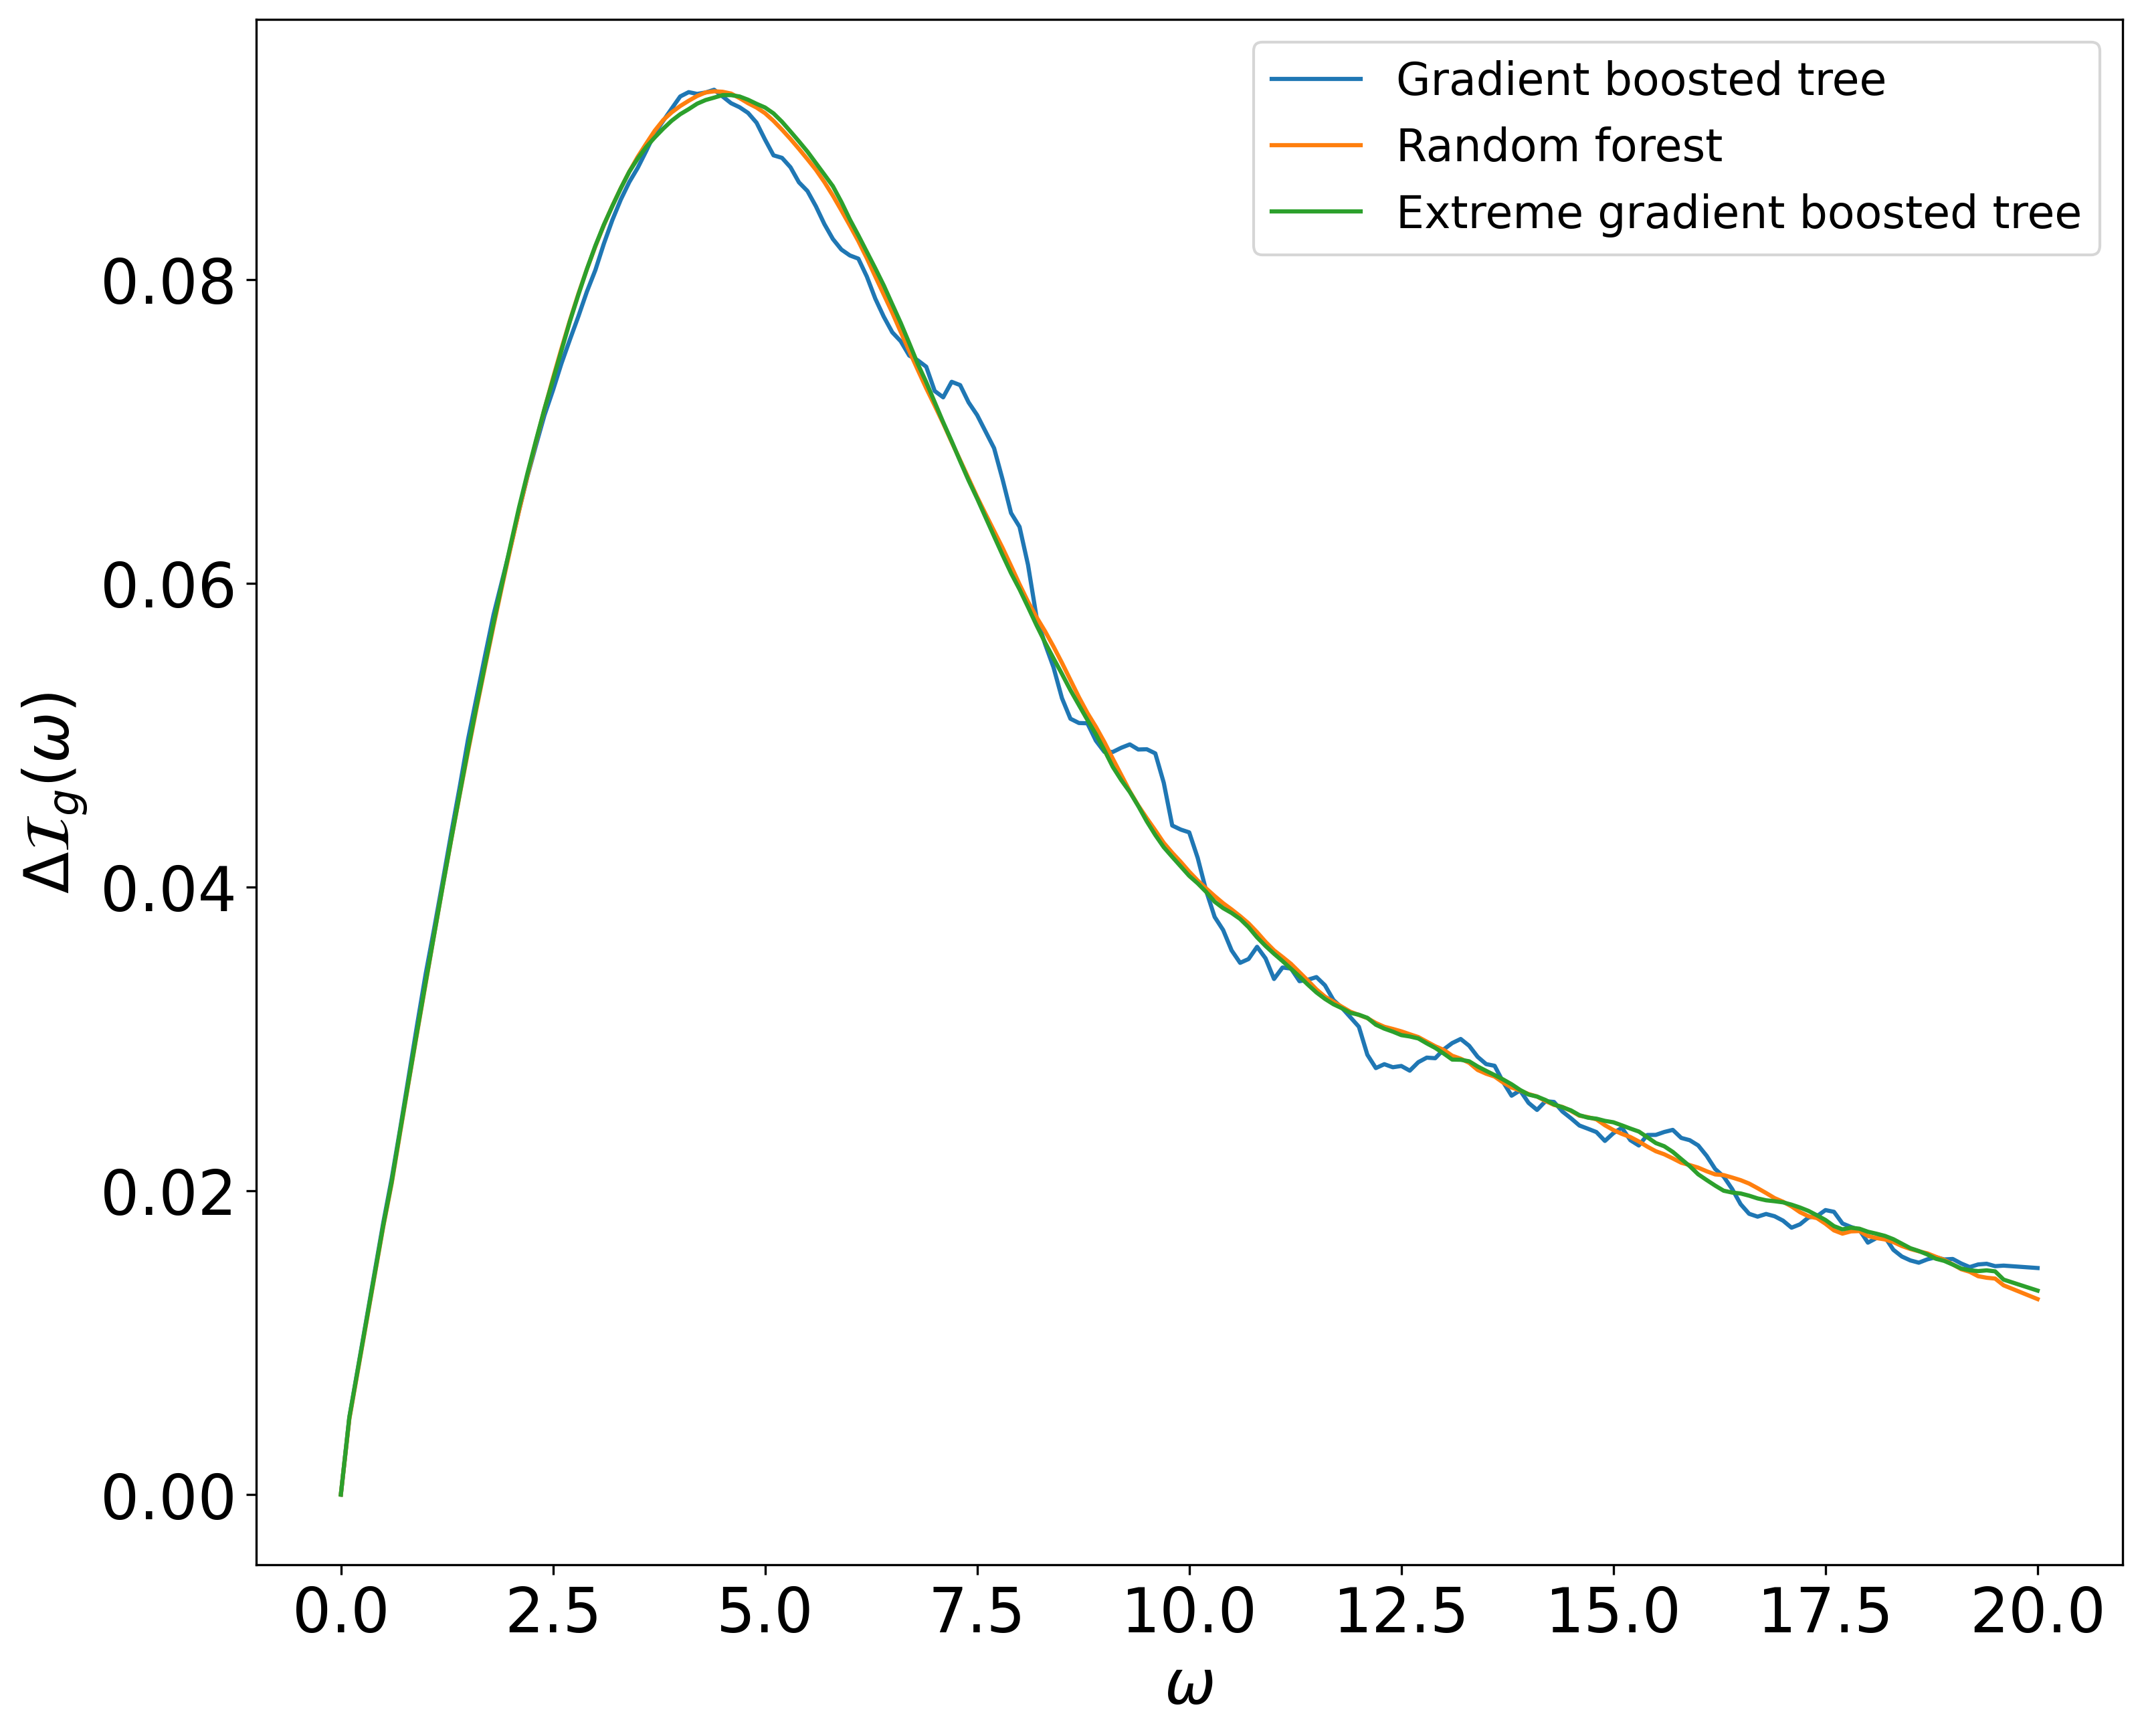

In [18]:
plt.figure(dpi=300)
plt.plot(df_gb['W'], df_gb['Mean_smooth_IGB'], '-', label='Gradient boosted tree')
plt.plot(df_rf['W'], df_rf['Mean_smooth_IRF'], '-', label='Random forest')
plt.plot(df_xgb['W'], df_xgb['Mean_smooth_IXGB'], '-', label='Extreme gradient boosted tree')
plt.legend(prop={'size':16})
plt.xlabel("$\omega$")
plt.ylabel("$\Delta\mathcal{I}_g(\omega)$")
plt.show()